In [1]:
# standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
# local
from acquire import get_german_power

# Prepare Exercises

In [2]:
def get_superstore():
    return pd.read_csv('ts_superstore.csv', index_col=0)

## Using your store items data:


In [3]:
ss = get_superstore()
ss

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231
912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231
912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231
912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231


### 1. Convert date column to datetime format.


In [4]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_id        913000 non-null  int64  
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
 9   item_upc12     913000 non-null  int64  
 10  item_upc14     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_id       913000 non-null  int64  
 14  store_state    913000 non-null  object 
 15  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [5]:
# ss.sale_date = ss.sale_date.astype('datetime64')
ss.sale_date = ss.sale_date.str.replace(' 00:00:00 GMT', '')
ss.sale_date = ss.sale_date.str.strip()
ss.sale_date = pd.to_datetime(ss.sale_date, format = '%a, %d %b %Y')
ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item           913000 non-null  int64         
 1   sale_amount    913000 non-null  float64       
 2   sale_date      913000 non-null  datetime64[ns]
 3   sale_id        913000 non-null  int64         
 4   store          913000 non-null  int64         
 5   item_brand     913000 non-null  object        
 6   item_id        913000 non-null  int64         
 7   item_name      913000 non-null  object        
 8   item_price     913000 non-null  float64       
 9   item_upc12     913000 non-null  int64         
 10  item_upc14     913000 non-null  int64         
 11  store_address  913000 non-null  object        
 12  store_city     913000 non-null  object        
 13  store_id       913000 non-null  int64         
 14  store_state    913000 non-null  object        
 15  

### 2. Plot the distribution of sale_amount and item_price.


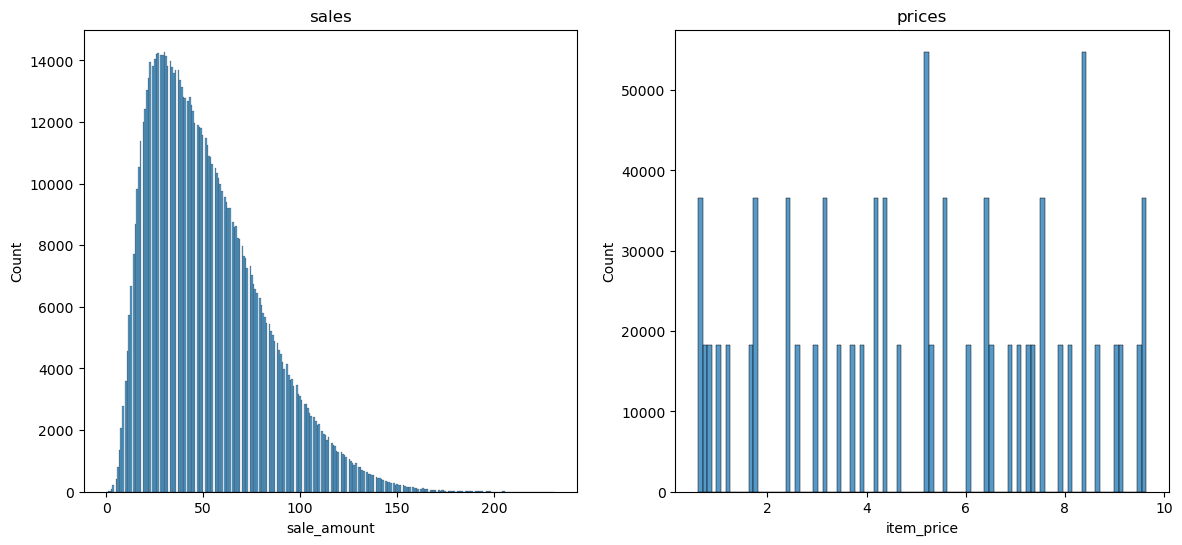

In [6]:
plt.figure(figsize=[14,6])
plt.subplot(121)
sns.histplot(data=ss,x='sale_amount')
plt.title('sales')
plt.subplot(122)
sns.histplot(data=ss,x='item_price')
plt.title('prices')
plt.show()

### 3. Set the index to be the datetime variable.


In [7]:
ss = ss.set_index('sale_date').sort_index()
ss

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,39,31.0,706662,7,Munchies,39,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,28400029254,28400029254,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2017-12-31,40,22.0,724922,7,Amys,40,Amys Light & Lean Spaghetti Italiano,0.60,42272008063,42272008063,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2017-12-31,41,19.0,743182,7,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,12018 Perrin Beitel Rd,San Antonio,7,TX,78217


### 4. Add a 'month' and 'day of week' column to your dataframe.


In [8]:
ss = ss.assign(month=ss.index.month_name(),day_of_week=ss.index.day_name())
ss

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tuesday
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,39,31.0,706662,7,Munchies,39,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,28400029254,28400029254,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sunday
2017-12-31,40,22.0,724922,7,Amys,40,Amys Light & Lean Spaghetti Italiano,0.60,42272008063,42272008063,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sunday
2017-12-31,41,19.0,743182,7,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sunday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [9]:
ss = ss.assign(sales_total=(ss.sale_amount * ss.item_price))
ss

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tuesday,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,39,31.0,706662,7,Munchies,39,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,28400029254,28400029254,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sunday,279.62
2017-12-31,40,22.0,724922,7,Amys,40,Amys Light & Lean Spaghetti Italiano,0.60,42272008063,42272008063,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sunday,13.20
2017-12-31,41,19.0,743182,7,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With B...,5.62,31000670016,31000670016,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,December,Sunday,106.78


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [10]:
def prep_superstore(df):
    # df.sale_date = df.sale_date.astype('datetime64') # takes too long
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    df.sale_date = df.sale_date.str.strip()
    df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y')
    df = df.set_index('sale_date').sort_index()
    df = df.assign(month=df.index.month_name(),day_of_week=df.index.day_name())
    df = df.assign(sales_total=(df.sale_amount * df.item_price))
    return df

def plt_dist(df,x):
    sns.histplot(data=df.reset_index(),x=x)
    plt.title(x)
    plt.show()

In [11]:
ss1 = get_superstore()
ss1.head(2)

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [12]:
ss1 = prep_superstore(ss1)
ss1.head(2)

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,30.16


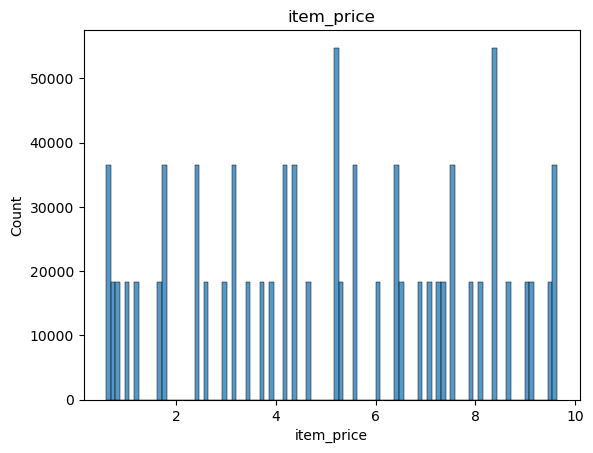

In [13]:
plt_dist(ss1,'item_price')

# sns.histplot(data=ss1.reset_index(),x='item_price')
# plt.title('item_price')
# plt.show()

## Using the OPS data acquired in the Acquire exercises german_power.csv, complete the following:


In [14]:
gp = get_german_power()
gp

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


### 1. Convert date column to datetime format.


In [15]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [16]:
gp.Date = gp.Date.astype('datetime64')
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


### 2. Plot the distribution of each of your variables.


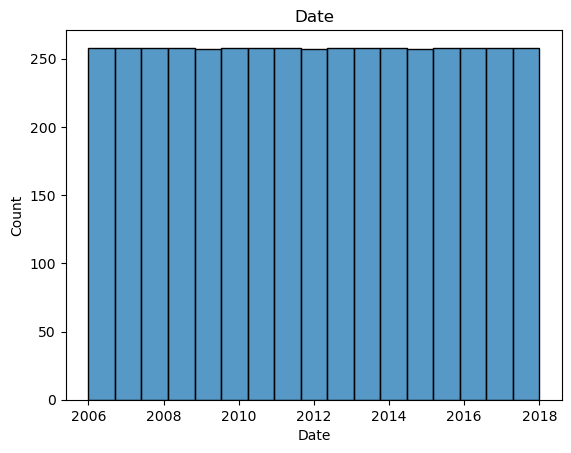

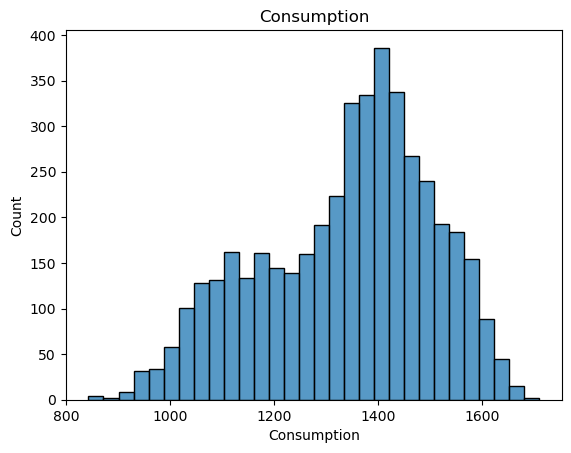

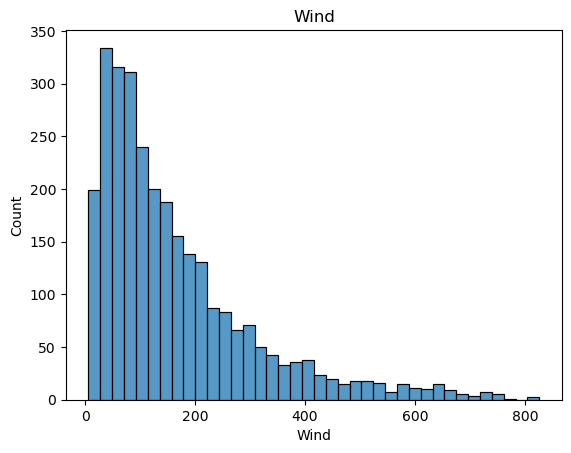

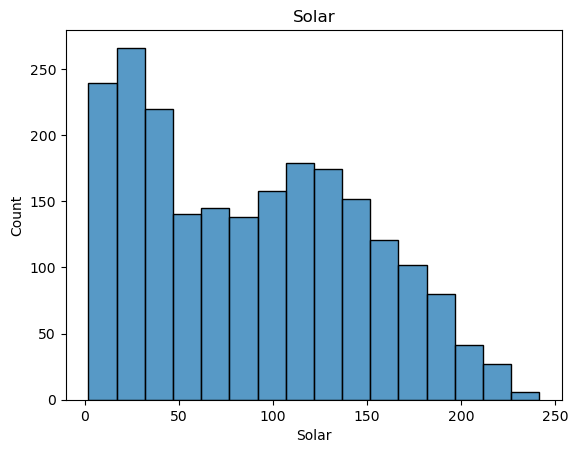

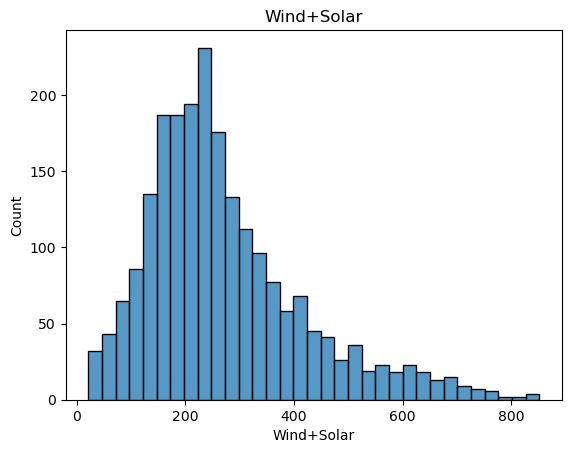

In [17]:
for col in gp.columns:
    plt_dist(gp,col)

### 3. Set the index to be the datetime variable.


In [18]:
gp = gp.set_index('Date').sort_index()
gp

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


### 4. Add a month and a year column to your dataframe.


In [19]:
gp = gp.assign(month=gp.index.month_name(),year=gp.index.year)
gp

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


### 5. Fill any missing values.


In [20]:
gp.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [21]:
# probably started with no wind or solar
# so first value will be set to 0
gp.loc[gp.index == gp.index.min(), ['Wind','Solar']] = 0
gp.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006


In [22]:
# will ffill from then on so starting will be 0
# but later nulls can be filled with previous days
gp.Wind = gp.Wind.ffill()
gp.Solar = gp.Solar.ffill()
gp

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,NaN,January,2006
2006-01-02,1380.52100,0.000,0.000,NaN,January,2006
2006-01-03,1442.53300,0.000,0.000,NaN,January,2006
2006-01-04,1457.21700,0.000,0.000,NaN,January,2006
2006-01-05,1477.13100,0.000,0.000,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [23]:
# wind+solar is the sum so after above just add
gp['Wind+Solar'] = (gp.Wind + gp.Solar)
gp

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [24]:
def prep_german_power(df):
    df.Date = df.Date.astype('datetime64')
    df = df.set_index('Date').sort_index()
    df = df.assign(month=df.index.month_name(),year=df.index.year)
    df.loc[df.index==df.index.min(),['Wind','Solar']]=0
    df.Wind = df.Wind.ffill()
    df.Solar = df.Solar.ffill()
    df['Wind+Solar'] = (df.Wind + df.Solar)
    return df

In [25]:
gp1 = get_german_power()
gp1

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [26]:
gp1 = prep_german_power(gp1)
gp1

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017
